****
<a id='lesson-2'></a>
# Lesson-2: Logistic Map
****

## Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

## Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial. 
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems. 

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map

## Task-1
Write a function that will take as input the following: 
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$. 
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.4, 5.52
1. Comment



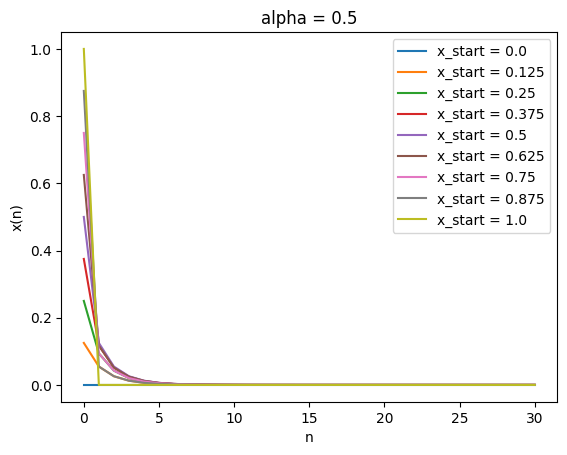

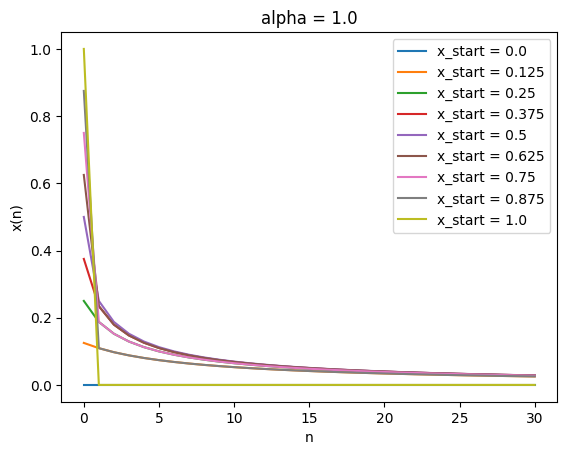

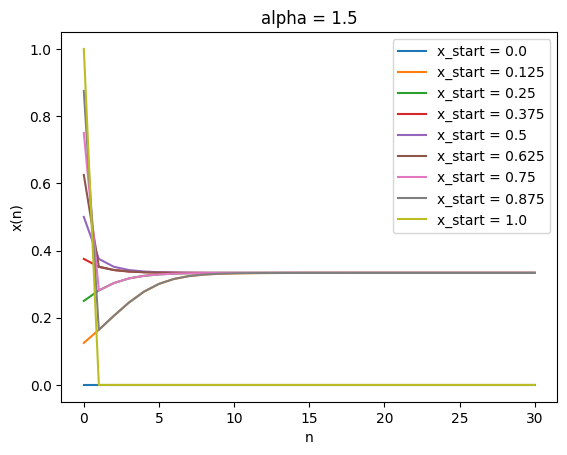

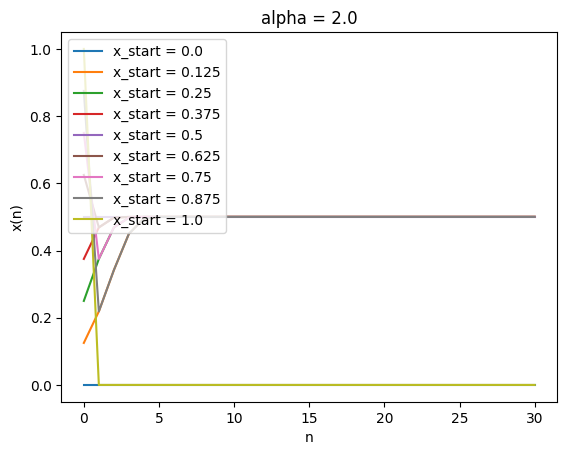

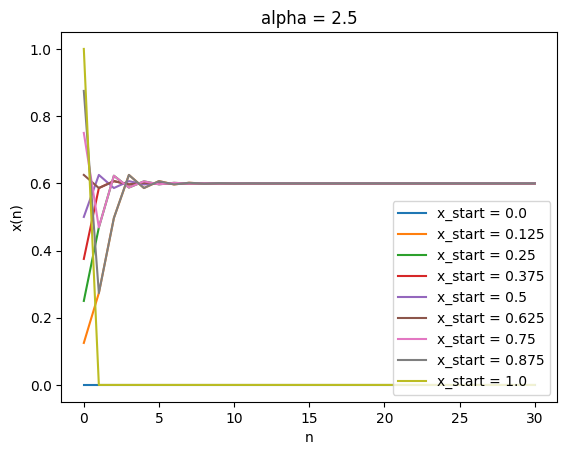

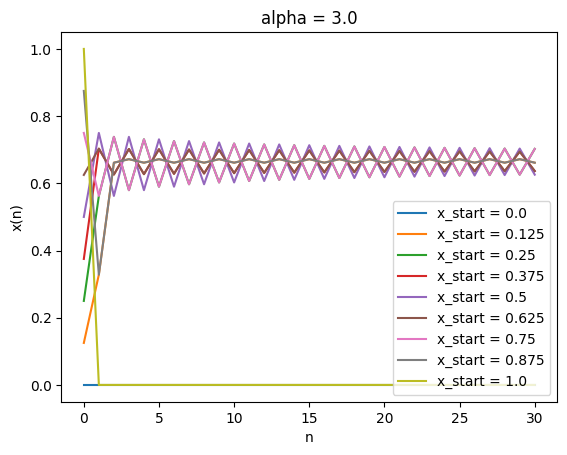

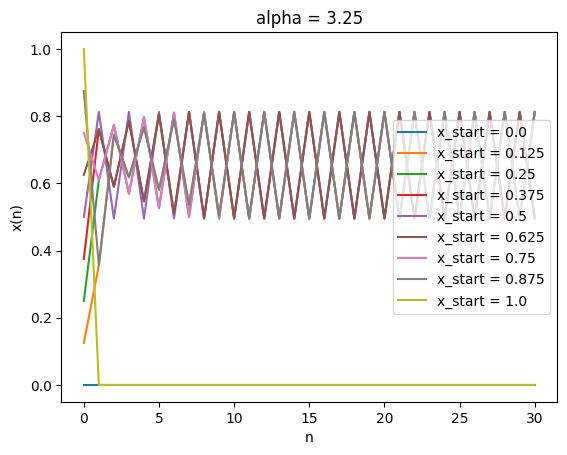

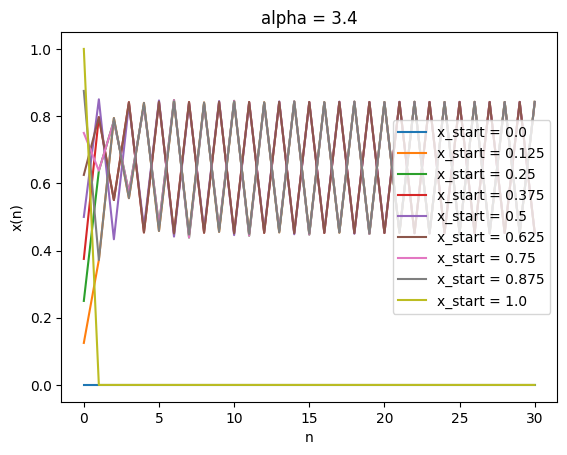

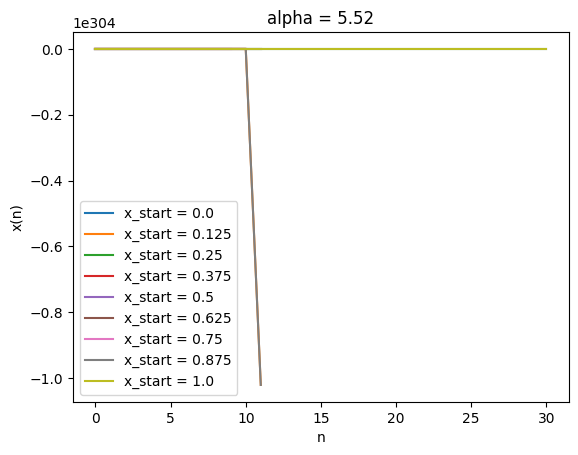

In [1]:
import matplotlib.pyplot as plt
import numpy

import warnings

warnings.filterwarnings("error")

ALPHAS = (0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.4, 5.52)


def logistic_func(alpha, x):
    if x is None:
        raise RuntimeError()

    try:
        return alpha * x * (1 - x)
    except RuntimeWarning:
        # overflowed to a large negative number
        raise RuntimeError()


def logistic_map(alpha, x_start, iterations):
    ret = [x_start]
    for _ in range(iterations):
        try:
            ret.append(logistic_func(alpha, ret[-1]))
        except RuntimeError:
            ret.append(None)

    return ret


for i, alpha in enumerate(ALPHAS):
    for x_start in numpy.linspace(0, 1, 9):
        plt.plot(logistic_map(alpha, x_start, 30), label=f"{x_start = }")
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("x(n)")
    plt.title(f"{alpha = }")
    plt.show()


### Graph observations

##### $\alpha \in \{0.5, 1.0\}$ ($0 \le \alpha \le 1$)
- We observe that the value finally settles at 0
- This behaviour is independent of initial x

##### $\alpha \in \{1.5, 2.0, 2.5, 3.0\}$ ($1 \lt \alpha \le 3$)
- If $x \in \{0, 1\}$, as expected the plot is settled at 0
- For other values in between, the graph settles at some nonzero value. This value is given by $1 - \frac{1}{\alpha}$
- Additionally, for $2 \lt \alpha \le 3$ we observe that the graph tends to fluctuate before settling at the expected value for large iterations

##### $\alpha \in \{3.25, 3.4\}$ ($3 \lt \alpha \le 3.44949$ (approx))
- For starting value $0 \lt x_0 \lt 1$ we see the plot oscillating between two stable points (given by ${\frac {1}{2r}}\left(r+1\pm {\sqrt {(r-3)(r+1)}}\right)$)

##### $\alpha = 5.52$ ($ \alpha \gt 4$)
- For starting value $0 \lt x_0 \lt 1$ we observe that after a particular point the value keeps getting more and more negative for each iteration and quickly becomes very negative, and this is unbounded.
- This case is typically considered to be "out of range" of the logistic maps.

## Task-2
Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps.



In [2]:
def logistic_map_phase_plot(alpha, x=(0, 1), iterations=1000):
    x_vals = numpy.linspace(x[0], x[1], iterations)
    y_vals = []
    for x in x_vals:
        y_vals.append(logistic_func(alpha, x))

    plt.plot(x_vals, y_vals, label=f"{alpha = }")


Text(0.5, 1.0, 'Phase plot of logistic map (x[i+1] vs x[i])')

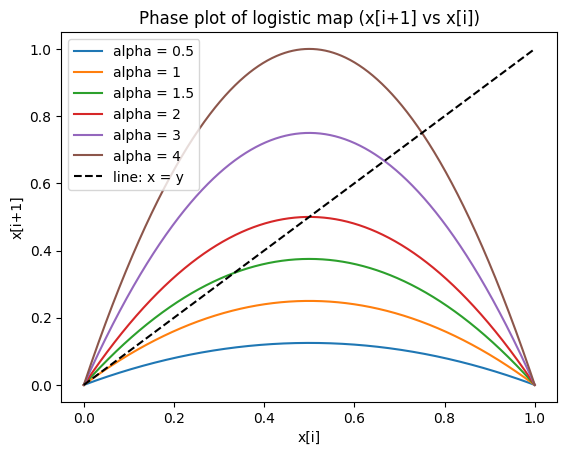

In [3]:
for alpha in (0.5, 1, 1.5, 2, 3, 4):
    logistic_map_phase_plot(alpha)

plt.plot((0, 1), (0, 1), linestyle="dashed", label="line: x = y", color="black")
plt.legend()
plt.xlabel("x[i]")
plt.ylabel("x[i+1]")
plt.title("Phase plot of logistic map (x[i+1] vs x[i])")


- We observe that the curves are parabolas (as expected from the equation)
- For reference $y = x$ line is drawn, for $\alpha \le 1$ the parabola only intersects the line at one point (that is, $x = 0$) and for $\alpha \gt 1$ the line intersects the parabola at two points.

## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$.<br>

Solution: consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$.  


### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$

1. Find roots of $f^{(n)}-x=0$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$
2. Check the stability of the roots. 
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

Alternatively: 
$ \frac{d}{dx} f^{(n)}(x) = \frac{df(x_{n-1})}{dx}  \frac{d}{dx} f^{(n-1)}(x)  = \left[\alpha (1-2 x_{n-1})\right] \frac{d}{dx} f^{(n-1)}(x_{n-1}) $, which is a recursive formula for the derivative!

\begin{eqnarray}
\text{ Denote } x_n &= f^{(n)}(x) \\
\frac{d}{dx} f^{(n)}(x) & = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) =
                     \left[\alpha (1-2 x_{(n-1)})\right] \frac{d}{dx} x_{(n-1)} \\
 \text{ with } x_0 = x \implies \frac{d}{dx} x_0 = 1
\end{eqnarray}

$$ \frac{d}{dx} f^{(n)}(x)  = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) = f^\prime(x_{(n-1)}) \frac{d}{dx} x_{(n-1)} \text{ where }f^\prime(x)=\alpha (1-2x) \text{ and }\frac{d}{dx}x_0 = 1$$

So that $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0)\text{ where }x_0=x\text{ and }x_n=f^{(n)}(x_0)$$
and use `scipy.optimize.fixed_point`


In [4]:
import scipy.optimize


FIXED_POINT_START = 0.5


def func_n_calculator(x, alpha, n):
    ret = logistic_map(alpha, x, n)[-1]
    if ret is None:
        raise RuntimeError()

    return ret


def f_dash(x, alpha):
    return alpha * (1 - 2 * x)


def calculate_steady_state_cycle(alpha, max_i=100, do_exponential=False):
    i = 1
    while i <= max_i:
        try:
            ret = float(
                scipy.optimize.fixed_point(
                    func_n_calculator, FIXED_POINT_START, (alpha, i)
                )
            )

            ret_map = logistic_map(alpha, ret, i - 1)
            der = 1
            for j in ret_map:
                der *= f_dash(j, alpha)

            if abs(der) <= 1:
                return [round(i, 8) for i in ret_map]

        except RuntimeError:
            pass

        if do_exponential:
            i *= 2
        else:
            i += 1

    return []


for alpha in (0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.4, 3.5, 3.55, 3.6, 3.83, 3.845):
    ss = calculate_steady_state_cycle(alpha)
    print(f"For {alpha = }:")
    if len(ss) == 0:
        print("    Could not find steady state!")
        print("    The behaviour is either chaotic, or the cycle is too large to")
        print("    compute in a reasonable amount of time")
    elif len(ss) == 1:
        print(f"    Steady state is at {ss[0]}")
    else:
        print(f"    Steady state is a {len(ss)}-cycle, which is {ss}")


For alpha = 0:
    Steady state is at 0.0
For alpha = 0.5:
    Steady state is at 0.0
For alpha = 1.0:
    Steady state is at 0.0
For alpha = 1.5:
    Steady state is at 0.33333333
For alpha = 2.0:
    Steady state is at 0.5
For alpha = 2.5:
    Steady state is at 0.6
For alpha = 3.0:
    Steady state is at 0.66666667
For alpha = 3.4:
    Steady state is a 2-cycle, which is [0.45196325, 0.8421544]
For alpha = 3.5:
    Steady state is a 4-cycle, which is [0.50088421, 0.87499726, 0.38281968, 0.82694071]
For alpha = 3.55:
    Steady state is a 8-cycle, which is [0.50603051, 0.8873709, 0.35480045, 0.81265567, 0.54047483, 0.88168435, 0.37032556, 0.82780512]
For alpha = 3.6:
    Could not find steady state!
    The behaviour is either chaotic, or the cycle is too large to
    compute in a reasonable amount of time
For alpha = 3.83:
    Steady state is a 3-cycle, which is [0.50466649, 0.9574166, 0.15614932]
For alpha = 3.845:
    Steady state is a 6-cycle, which is [0.50092958, 0.96124668, 0.

- These sample results are inline with the "graph observations" mentioned above. 
- The interesting thing to note here is the existence of "island of stability" that comes after a region of chaos, which has stable 3 cycles (and later 6, 12, ... and so on)


## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.



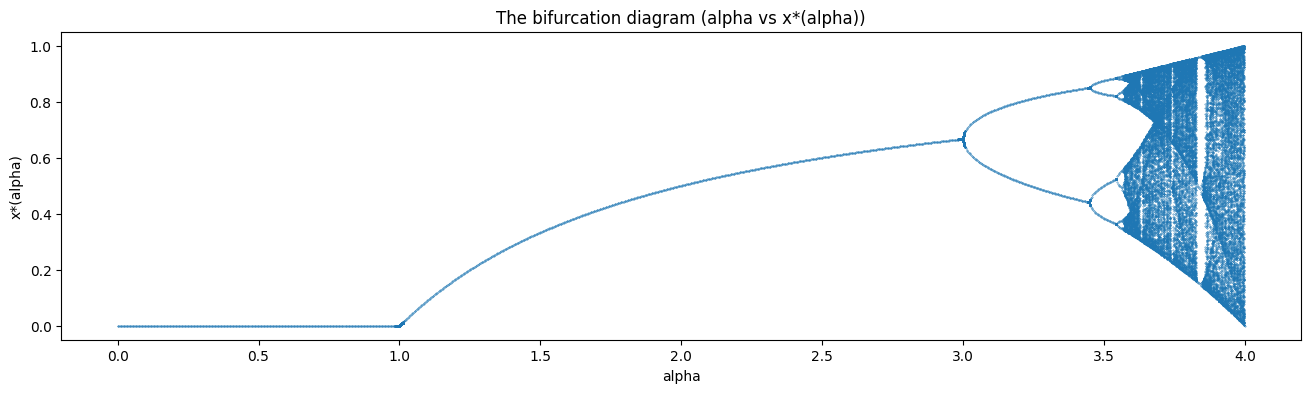

In [5]:
N = 1000
S = 200


def logistic_map_approximate_steady_cycle(alpha):
    return list(
        set((round(i, 8) for i in logistic_map(alpha, FIXED_POINT_START, N)[-S:]))
    )


x_vals = []
y_vals = []

for r in numpy.linspace(0, 4, 1500):
    cur = logistic_map_approximate_steady_cycle(r)
    x_vals.extend([r] * len(cur))
    y_vals.extend(cur)


plt.figure(figsize=(16, 4))
plt.xlabel("alpha")
plt.ylabel("x*(alpha)")
plt.title("The bifurcation diagram (alpha vs x*(alpha))")
plt.scatter(x_vals, y_vals, s=0.1)


- This is the expected graph, and it matches all the above observations and notes.
- The curve in the region [1, 3] must be $1 - \frac{1}{\alpha}$
- From the graph we can visually see the bifurcations that start at $x = 3$ and keep happening till about 3.57, after which there is a region of chaos. At about 3.83 we see an "island of stability" with stable 3-cycle, which also starts bifurcating leading to cycles of 6, 12 and so on 


## Task-5
Find the ratio between two consequtive bifurcations.

In [6]:
MAX_SPLITS = 10
MAX_I = 2 ** MAX_SPLITS
RATIO_GUESS = 4

prev_splits = 1
bifurcation_points = []

a = 3
dx = 0.001
while len(bifurcation_points) < MAX_SPLITS:
    cur_splits = len(calculate_steady_state_cycle(a, max_i=MAX_I, do_exponential=True))
    if cur_splits == 0:
        continue

    if cur_splits != prev_splits:
        print(f"[INFO] Bifurcation at alpha = {a} (cycle size is now {cur_splits})")
        bifurcation_points.append(a)
        dx /= RATIO_GUESS

    prev_splits = cur_splits
    a += dx

bifurcation_diffs = [
    val - bifurcation_points[i] for i, val in enumerate(bifurcation_points[1:])
]
bifurcation_ratios = [
    bifurcation_diffs[i] / val for i, val in enumerate(bifurcation_diffs[1:])
]
for i, val in enumerate(bifurcation_ratios, start=1):
    print(f"Bifurcation ratio {i}: {val}")


[INFO] Bifurcation at alpha = 3.001 (cycle size is now 2)
[INFO] Bifurcation at alpha = 3.4494999999997513 (cycle size is now 4)
[INFO] Bifurcation at alpha = 3.544124999999531 (cycle size is now 8)
[INFO] Bifurcation at alpha = 3.5644218749996277 (cycle size is now 16)
[INFO] Bifurcation at alpha = 3.568761718749525 (cycle size is now 32)
[INFO] Bifurcation at alpha = 3.5696923828122147 (cycle size is now 64)
[INFO] Bifurcation at alpha = 3.56989135742163 (cycle size is now 128)
[INFO] Bifurcation at alpha = 3.5699340209957025 (cycle size is now 256)
[INFO] Bifurcation at alpha = 3.569943176269042 (cycle size is now 512)
[INFO] Bifurcation at alpha = 3.569945140838227 (cycle size is now 1024)
Bifurcation ratio 1: 4.739762219295077
Bifurcation ratio 2: 4.662047728989199
Bifurcation ratio 3: 4.676867686901601
Bifurcation ratio 4: 4.663168939128595
Bifurcation ratio 5: 4.677300613496932
Bifurcation ratio 6: 4.663805453304451
Bifurcation ratio 7: 4.660000033905963
Bifurcation ratio 8: 4.6

We observe that this ratio is more or less a constant among bifurcations, particularly in the limit of cycle size approaching infinity, this becomes the Feigenbaum constant which is approximately 4.669201